<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/08_bootstrap_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrap Demonstration

Goal:
- Estimate variability of a statistic using bootstrap
- Visualize sampling distribution
- Connect bootstrap to bagging intuition


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
X, y = make_regression(
    n_samples=200,
    n_features=1,
    noise=20,
    random_state=42
)

In [3]:
n_bootstrap = 500
coefficients = []

for _ in range(n_bootstrap):
    indices = np.random.choice(len(X), len(X), replace=True)
    X_sample = X[indices]
    y_sample = y[indices]

    model = LinearRegression()
    model.fit(X_sample, y_sample)
    coefficients.append(model.coef_[0])

coefficients = np.array(coefficients)


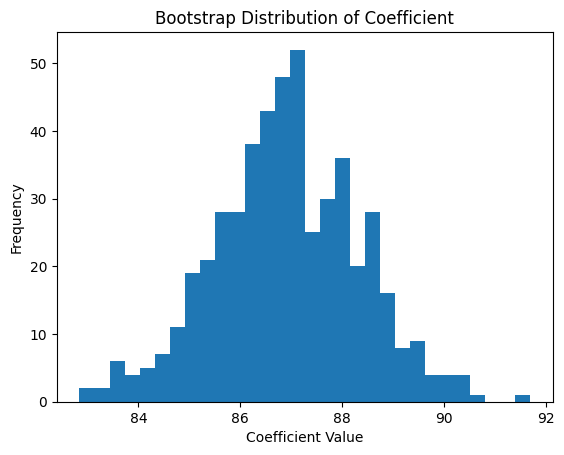

Mean: 86.91515053695537
Std Dev: 1.4223043259417696


In [4]:
plt.hist(coefficients, bins=30)
plt.title("Bootstrap Distribution of Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.show()

print("Mean:", np.mean(coefficients))
print("Std Dev:", np.std(coefficients))

Observations:

- Bootstrap produces a distribution of coefficient estimates.
- The spread estimates variance of the estimator.
- This demonstrates how uncertainty can be quantified using resampling.
- Bagging extends this idea to reduce variance in predictions.
